## Part1: 机器学习框架 Torch 介绍

Torch 是一个以机器学习为核心的科学计算框架。由于采用了高效的脚本语言LuaJIT，同时提供了一个灵活的交互计算环境，因此，Torch 特别适合用来开发机器学习相关任务。此外Torch对C/CUDA支持非常好，因此也能很好的胜任大规模的计算任务，如深度学习的训练。

关键的特征：

* 一个强大的张量库（Tensor,N-dimensional array），支持各种下标、切片访问以及变换
* 完整的线性代数支持，类似于Matlab的接口
* 集成了state of art的神经网络、概率图模型实现
* 集成常规的数值优化计算
* 友好的交互计算，可视化支持
* 非常容易集成C语言开发本地代码
* 对CUDA支持非常友好
* 容易移植到iOS, Android等终端平台

```
$ th

  ______             __   |  Torch7                                   
 /_  __/__  ________/ /   |  Scientific computing for Lua.         
  / / / _ \/ __/ __/ _ \  |                                           
 /_/  \___/_/  \__/_//_/  |  https://github.com/torch   
                          |  http://torch.ch   
                        
```



### 1. 基础的矩阵计算演示

下面是最常用的矩阵计算函数:

* rand() which creates tensor drawn from uniform distribution
* t() which transposes a tensor (note it returns a new view)
* dot() which performs a dot product between two tensors
* eye() which returns a identity matrix

In [1]:
-- 构造一个5x5的随机矩阵
N = 5
A = torch.rand(N, N)
print(A) 

 0.3669  0.7558  0.3807  0.7782  0.4420
 0.2461  0.7218  0.9170  0.2530  0.4834
 0.2714  0.6528  0.2854  0.3949  0.3828
 0.2879  0.6680  0.2238  0.8213  0.7976
 0.7888  0.7018  0.9198  0.7489  0.4952
[torch.DoubleTensor of size 5x5]



以下代码输出对称矩阵
$$
A = A * A^T
$$

In [2]:
A = A*A:t()
print(A)

 1.6518  1.3954  1.1782  1.6874  1.9718
 1.3954  1.7200  1.0846  1.3515  1.9729
 1.1782  1.0846  0.8838  1.2078  1.4201
 1.6874  1.3515  1.2078  1.8899  1.9118
 1.9718  1.9729  1.4201  1.9118  2.7669
[torch.DoubleTensor of size 5x5]



下面代码实现计算：矩阵乘向量，即列向量的线性组合。

$$
  B = A * v
$$

In [4]:
v = torch.rand(5,1)
B = A*v
print("v=")
print(v)
print("B=")
print(B)

v=	
 0.3445
 0.6221
 0.8973
 0.5904
 0.7642
[torch.DoubleTensor of size 5x1]

B=	
 4.9974
 4.8296
 3.6720
 5.0827
 6.4241
[torch.DoubleTensor of size 5x1]



计算反矩阵：

$$
C = A^{-1}
$$

In [5]:
C = torch.inverse(A)
print(C)
print(C*A)

 33.3314   7.1113 -27.3597  -7.9975  -9.2554
  7.1113   6.0192 -11.1720   0.5108  -3.9786
-27.3597 -11.1720  44.2274  -2.2147   6.2943
 -7.9975   0.5108  -2.2147   7.2185   1.4840
 -9.2554  -3.9786   6.2943   1.4840   5.5380
[torch.DoubleTensor of size 5x5]



 1.0000 -0.0000 -0.0000 -0.0000 -0.0000
-0.0000  1.0000 -0.0000 -0.0000 -0.0000
 0.0000  0.0000  1.0000 -0.0000  0.0000
-0.0000 -0.0000 -0.0000  1.0000  0.0000
 0.0000  0.0000  0.0000  0.0000  1.0000
[torch.DoubleTensor of size 5x5]



### 2. 可视化演示


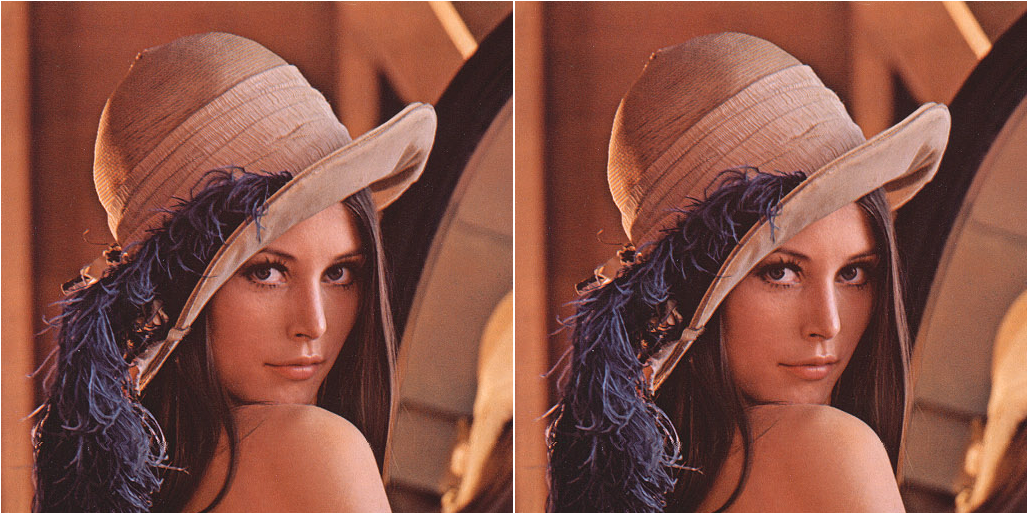

In [6]:
require('image')
itorch.image({image.lena(), image.lena()})

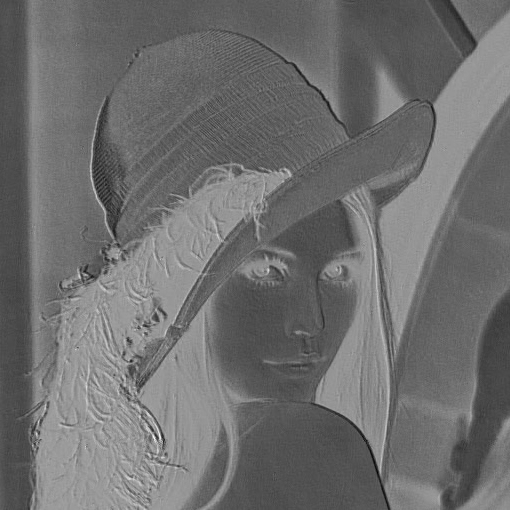

In [7]:
require ('nn')
-- 利用神经网络构造一个随机的3x3x3滤波器，对RGB图像进行进行滤波操作
m=nn.SpatialConvolution(3,1,3,3)
n=m:forward(image.lena())
itorch.image(n)

In [8]:
Plot = require 'itorch.Plot'
x1 = torch.randn(40):mul(100)
y1 = torch.randn(40):mul(100)
x2 = torch.randn(40):mul(100)
y2 = torch.randn(40):mul(100)
x3 = torch.randn(40):mul(200)
y3 = torch.randn(40):mul(200)
plot = Plot():circle(x1, y1, 'red', 'hi'):circle(x2, y2, 'blue', 'bye'):draw()
plot:circle(x3,y3,'green', 'yolo'):redraw()
plot:title('Scatter Plot Demo'):redraw()
plot:xaxis('length'):yaxis('width'):redraw()
plot:legend(true)
plot:redraw()

### 3. 梯度下降算法演示

Torch支持多种数值计算优化算法，包括SGD, Adagrad, Conjugate-Gradient, LBFGS, RProp等等。

This package contains several optimization routines for Torch. Each optimization algorithm is based on the same interface:
```
x*, {f}, ... = optim.method(func, x, state)
```
where:

* ```func```: a user-defined closure that respects this API: ```f, df/dx = func(x)```
* ```x```: the current parameter vector (a 1D torch.Tensor)
* ```state```: a table of parameters, and state variables, dependent upon the algorithm
* ```x*```: the new parameter vector that minimizes ```f, x* = argmin_x f(x)```
* ```{f}```: a table of all f values, in the order they've been evaluated (for some simple algorithms, like SGD, ```#f == 1```)

这里设计一个一维的线性回归，即直线拟合的例子。

In [9]:
-- 构造训练样本
N = 32
x = {}
y = {}
for i=1, N do
    x[i] = (math.random() - 0.5) * 20
    y[i] = 0.7*x[i] + 5.0 + (math.random()-0.5) 
end

Plot = require 'itorch.Plot'
local plot = Plot()
plot:circle(x,y,'black', 'yolo'):draw()
plot:title('直线拟合'):redraw()

In [10]:
require('optim')

-- 纪录输出日志
batchLog = {}
batchLog.value = {}
batchLog.seq = {}

parameter = torch.Tensor(2)
parameter[1] = 0
parameter[2] = 0

-- 首先构造 func(x)
function batchFunc(inParameter) 
  
  local sum = 0.0
  local deltaP = torch.Tensor(2)
    
  deltaP[1] = 0.0
  deltaP[2] = 0.0
  for i=1,#x do
    sum = sum + math.pow(inParameter[1] * x[i] + inParameter[2] - y[i],2)
    deltaP[1] = deltaP[1] + (inParameter[1] * x[i] + inParameter[2] - y[i]) * x[i]
    deltaP[2] = deltaP[2] + (inParameter[1] * x[i] + inParameter[2] - y[i])
  end
  sum = 0.5 * sum / #x
  deltaP = deltaP / #x

  batchLog.value[#batchLog.value+1] = sum
  batchLog.seq[#batchLog.seq+1] = #batchLog.seq+1
    
  return sum , deltaP
end


local state = {
   learningRate = 1.0e-2,
}

for i = 1,500 do
  optim.sgd(batchFunc, parameter ,state)
end

local plot = Plot()
plot:line(batchLog.seq, batchLog.value,'black', 'yolo'):draw()
plot:title('BGD'):redraw()


In [11]:
-- 绘制拟合出来的直线
drawResultLine = function()
  local resultValue = {}
  local resultSeq = {}
  for i=-10,10,0.1 do
    resultSeq[#resultSeq+1] = i
    resultValue[#resultValue+1] = i*parameter[1] + parameter[2]
  end
  local plot = Plot()
  plot:circle(x,y,'red', 'yolo'):draw()
  plot:line(resultSeq, resultValue,'black', 'yolo'):redraw()
  plot:title('直线拟合'):redraw()
    
end
drawResultLine()

由上面的曲线可以看出，设置learningRate非常重要，下面演示一下SGD算法。

In [12]:
require('optim')

-- 纪录输出日志
sgdLog = {}
sgdLog.value = {}
sgdLog.seq = {}

parameter[1] = 0
parameter[2] = 0

local sgdNumber = 0

-- 首先构造 func(x)
function sgdFunc(inParameter) 
  
  local sum = 0.0
  local deltaP = torch.Tensor(2)
    
    
  sgdNumber = (sgdNumber + 1) % #x
  local i = sgdNumber + 1
    
  sum = 0.5 * math.pow(inParameter[1] * x[i] + inParameter[2] - y[i],2)
  deltaP[1] = (inParameter[1] * x[i] + inParameter[2] - y[i]) * x[i]
  deltaP[2] = (inParameter[1] * x[i] + inParameter[2] - y[i])
    
  sgdLog.value[#sgdLog.value+1] = sum
  sgdLog.seq[#sgdLog.seq+1] = #sgdLog.seq+1
    
  return sum , deltaP
end


local state = {
   learningRate = 1.0e-2,
}

for i = 1,500 do
  optim.sgd(sgdFunc, parameter ,state)
end

local plot = Plot()
plot:line(sgdLog.seq, sgdLog.value,'black', 'yolo'):draw()
plot:title('SGD'):redraw()

drawResultLine()